In [23]:
from configclasses import TaskConfig
from embeddings import LoadEmbeddingDataset

config = TaskConfig(
    subject_model_name='gpt2-medium',
    input_corpus_dataset_name='Pile',
    input_corpus_datapoint_num=5000,
    context_window=25,
)

task_name = config.task_name() + 'normalized'

dataset = LoadEmbeddingDataset(task_name)

Checking ./dataset/gpt2-medium_Pile_5000_25normalized...
file_num: 12, tensor_num_per_file: 260417


Checking files: 100%|██████████| 12/12 [00:00<00:00, 39290.90it/s]

./dataset/gpt2-medium_Pile_5000_25normalized is complete


In [24]:
import torch
import seaborn as sns

model = torch.load(f'./result/IM_{task_name}.model')

confusion_matrix = torch.zeros(49, 49)

for page in range(dataset.file_num):
    page_tensor = dataset[page].cuda()

    X = page_tensor[:, :-2]
    y = page_tensor[:, -2]

    logits = model(X)

    result = torch.argmax(logits, dim=1)

    for i in range(len(y)):
        confusion_matrix[int(y[i].item()), int(result[i].item())] += 1

Text(50.722222222222214, 0.5, 'Ground Truth')

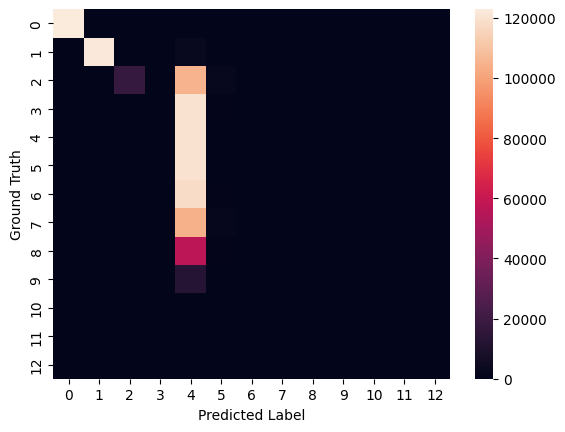

In [25]:
import matplotlib.pyplot as plt

plt.figure()

confusion_matrix = confusion_matrix[:13, :13]

heatmap = sns.heatmap(confusion_matrix)
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('Ground Truth')
